## GPyOPt: Bayesian Optimization with fixed constrains

In [17]:
%pylab inline
import GPyOpt
import GPy
from numpy.random import seed
seed(1234)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [18]:
# Define a feasible region
space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
        {'name': 'var_2', 'type': 'continuous', 'domain': (-1.5,1.5)}]

constrains = [
    {'name': 'constr_1', 'constrain': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
    {'name': 'constr_2', 'constrain': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

feasible_region =  GPyOpt.Design_space(space = space, constrains = constrains)
func      = GPyOpt.objective_examples.experiments2d.sixhumpcamel()

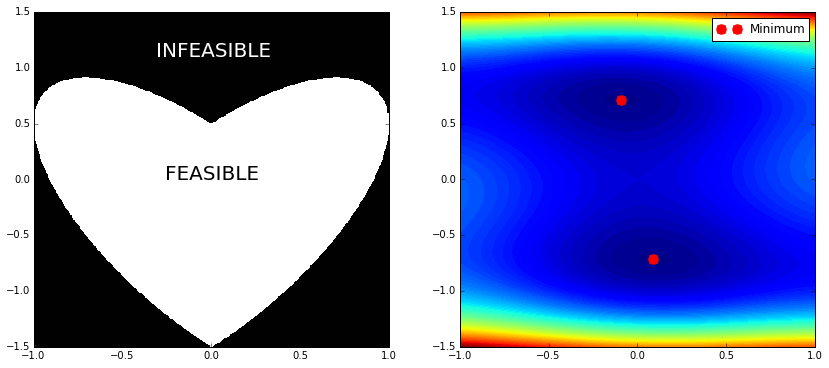

In [19]:
# plot of the feasible region
grid = 400
bounds = feasible_region.get_continuous_bounds()
X1 = np.linspace(bounds[0][0], bounds[0][1], grid)
X2 = np.linspace(bounds[1][0], bounds[1][1], grid)
x1, x2 = np.meshgrid(X1, X2)
X = np.hstack((x1.reshape(grid*grid,1),x2.reshape(grid*grid,1)))

masked_ind = feasible_region.indicator_constrains(X).reshape(grid,grid)
masked_ind = np.ma.masked_where(masked_ind > 0.5, masked_ind)
masked_ind[1,1]=1

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=1,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20)
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')
plt.subplot(122)
plt.plot()
plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100, alpha=1,origin ='lower')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')
plt.legend()

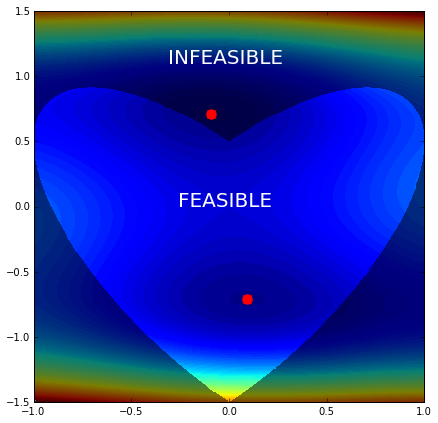

In [20]:
# --- Objective
# --- Load a problem from GPyOpt
objective = GPyOpt.core.task.SingleObjective(func.f, space)

plt.figure(figsize=(7,7))
OB = plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100,alpha=1)
IN = plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=.5,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20,color='white')
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')

In [21]:
# --- CHOOSE the model type
model = GPyOpt.models.GPModel(exact_feval=True,optimize_restarts=5,verbose=False)

In [22]:
# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(feasible_region)

In [23]:
# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, feasible_region, optimizer=aquisition_optimizer)

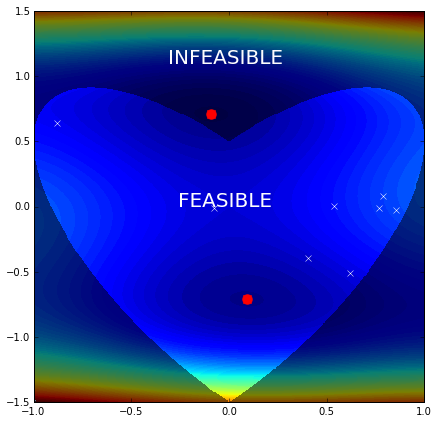

In [31]:
# --- CHOOSE the intial design
initial_design = GPyOpt.util.stats.initial_design('random', feasible_region, 8)

# Plot of the samples in the fesible region
plt.figure(figsize=(7,7))
OB = plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100,alpha=1)
IN = plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=.5,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20,color='white')
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')
plt.plot(initial_design[:,0],initial_design[:,1],'wx')

In [32]:
# --- CHOOSE a collection method
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

In [33]:
# BO object
bo = GPyOpt.core.BO(model, space, objective, acquisition, evaluator, initial_design)

In [34]:
# --- Stop conditions
max_time  = None 
max_iter  = 3
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbose=False) 

*Optimization completed:


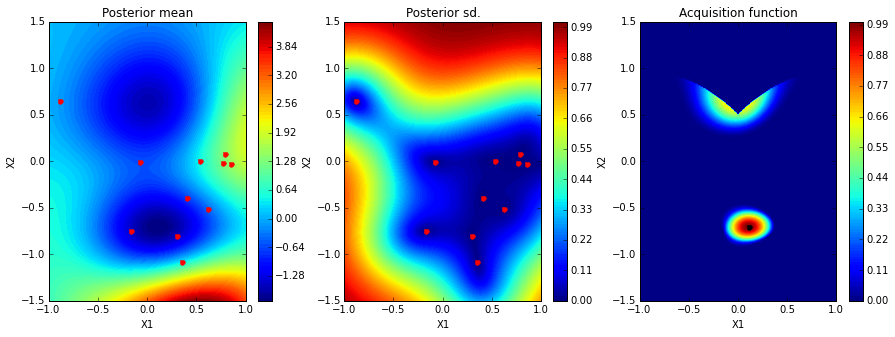

In [35]:
bo.plot_acquisition()

In [36]:
# --- Stop conditions
max_time  = None 
max_iter  = 20
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbose=False) 

*Optimization completed:


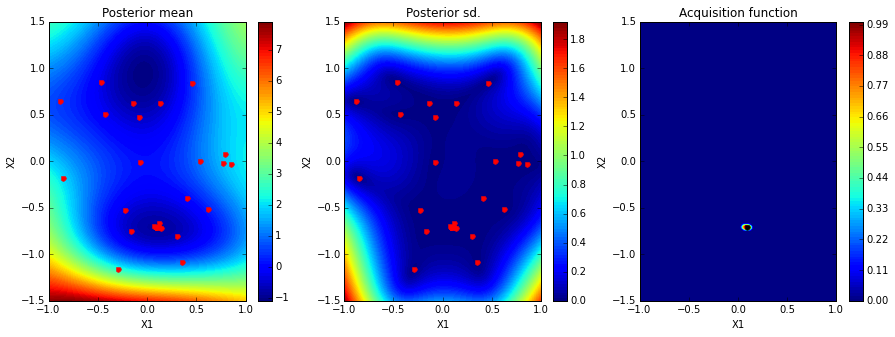

In [37]:
bo.plot_acquisition()

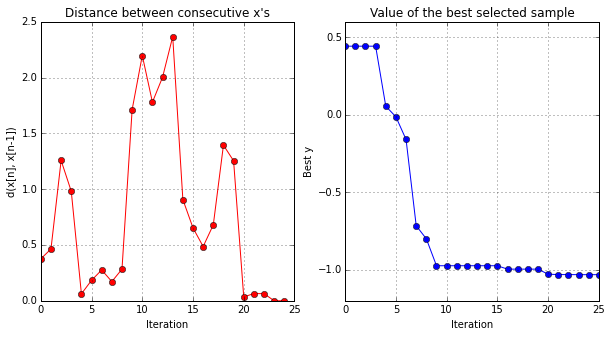

In [26]:
bo.plot_convergence()